In [ ]:
# Установка библиотек (выполнить в терминале)
# !pip install numpy matplotlib scikit-learn

KeyError: 0

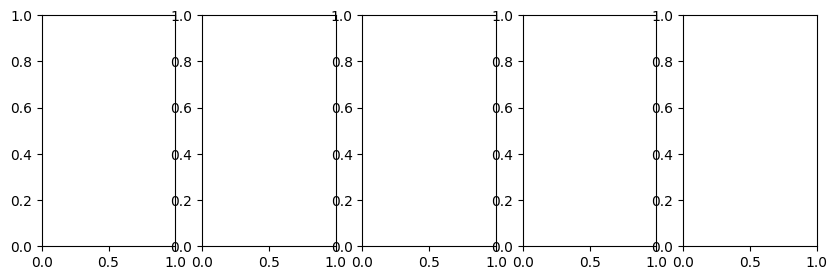

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Загрузка набора данных MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Визуализация первых 5 изображений
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y[i]}')
    ax.axis('off')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

# Нормализация данных
X = X / 255.0

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Создание модели KNN с K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Обучение модели на данных
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
from sklearn.metrics import accuracy_score

# Предсказание значений на тестовой выборке
y_pred = knn.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели KNN с K=3: {accuracy:.4f}')

Точность модели KNN с K=3: 0.9713


KeyError: 0

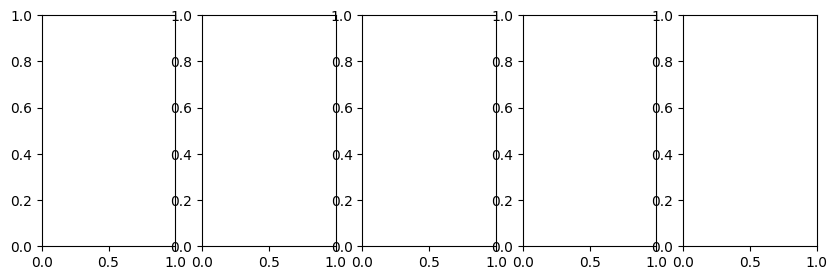

In [6]:
# Визуализация нескольких изображений и предсказаний
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {y_test[i]}\nPred: {y_pred[i]}')
    ax.axis('off')
plt.show()

In [7]:
k_values = [1, 3, 5, 10]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Точность модели KNN с K={k}: {accuracy:.4f}')

Точность модели KNN с K=1: 0.9720
Точность модели KNN с K=3: 0.9713
Точность модели KNN с K=5: 0.9701
Точность модели KNN с K=10: 0.9658


# Обсуждение результатов

1. При изменении параметра K можно заметить, что с увеличением K точность модели может изменяться.
2. Меньшие значения K могут привести к переобучению, тогда как большие значения могут не уловить детали.
3. Важно экспериментировать с K для нахождения оптимального значения для данной задачи.